# Occupancy Detection data set

In this notebook we will prepare and save the Occupancy Detection data Set from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#).


**Citation:**

Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, Veronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.

## Download the data

- Navigate to the [data folder](http://archive.ics.uci.edu/ml/machine-learning-databases/00357/).
- Download the zip file called **occupancy_data.zip**.
- Unzip the file.
- Save the file called **datatraining.txt** in the same folder that contains this notebook.

In [1]:
import pandas as pd

In [2]:
# load data

df = pd.read_table("datatraining.txt", sep=",", parse_dates=["date"])

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
# start data at the hour and finish at the hour

df = df[(df["date"] >= "2015-02-04 18:00:00") & (df["date"] < "2015-02-10 09:00:00")]

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
10,2015-02-04 18:00:00,23.075,27.175000,419.0,688.00,0.004745,1
11,2015-02-04 18:01:00,23.075,27.150000,419.0,690.25,0.004741,1
12,2015-02-04 18:02:00,23.100,27.100000,419.0,691.00,0.004739,1
13,2015-02-04 18:03:00,23.100,27.166667,419.0,683.50,0.004751,1
14,2015-02-04 18:04:00,23.050,27.150000,419.0,687.50,0.004734,1


In [4]:
# rename columns

columns = [
    "date",
    "temperature",
    "humidity",
    "light",
    "co2",
    "humidity_ratio",
    "occupancy",
]

df.columns = columns

df.head()

,date,temperature,humidity,light,co2,humidity_ratio,occupancy
10,2015-02-04 18:00:00,23.075,27.175000,419.0,688.00,0.004745,1
11,2015-02-04 18:01:00,23.075,27.150000,419.0,690.25,0.004741,1
12,2015-02-04 18:02:00,23.100,27.100000,419.0,691.00,0.004739,1
13,2015-02-04 18:03:00,23.100,27.166667,419.0,683.50,0.004751,1
14,2015-02-04 18:04:00,23.050,27.150000,419.0,687.50,0.004734,1


In [5]:
# add id
ls = []
c = 0
for i in range(len(df)):
    if i % 60 == 0:
        c = c + 1
    ls.append(c)

In [6]:
df["id"] = ls

df.head()

,date,temperature,humidity,light,co2,humidity_ratio,occupancy,id
10,2015-02-04 18:00:00,23.075,27.175000,419.0,688.00,0.004745,1,1
11,2015-02-04 18:01:00,23.075,27.150000,419.0,690.25,0.004741,1,1
12,2015-02-04 18:02:00,23.100,27.100000,419.0,691.00,0.004739,1,1
13,2015-02-04 18:03:00,23.100,27.166667,419.0,683.50,0.004751,1,1
14,2015-02-04 18:04:00,23.050,27.150000,419.0,687.50,0.004734,1,1


In [7]:
# re-order columns

df[["id"] + columns[0:-1]].to_csv("occupancy.csv", index=False)

In [8]:
# create target variable

occ = (df.groupby("id")["occupancy"].mean() > 0.5).astype(int)

occ.head()

id
1    0
2    0
3    0
4    0
5    0
Name: occupancy, dtype: int32

In [9]:
# save target variable

occ.to_csv("occupancy_target.csv", index=True)

## Plot

In [10]:
import matplotlib.pyplot as plt

In [11]:
# set date as index

df.set_index("date", inplace=True)

df.head()

,temperature,humidity,light,co2,humidity_ratio,occupancy,id
date,,,,,,,
2015-02-04 18:00:00,23.075,27.175000,419.0,688.00,0.004745,1,1
2015-02-04 18:01:00,23.075,27.150000,419.0,690.25,0.004741,1,1
2015-02-04 18:02:00,23.100,27.100000,419.0,691.00,0.004739,1,1
2015-02-04 18:03:00,23.100,27.166667,419.0,683.50,0.004751,1,1
2015-02-04 18:04:00,23.050,27.150000,419.0,687.50,0.004734,1,1


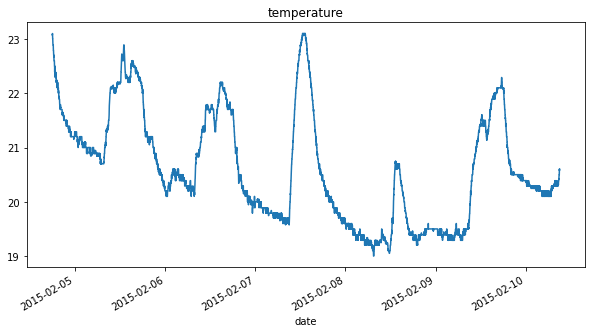

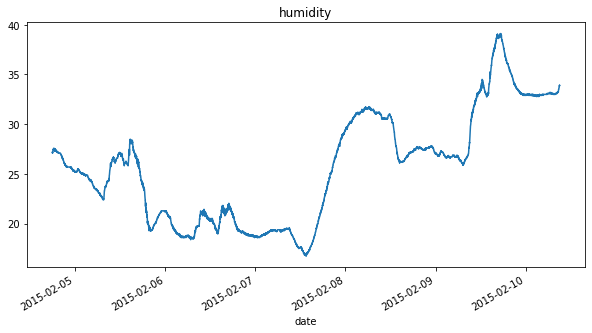

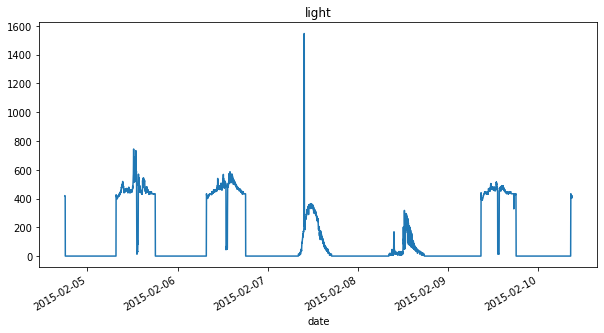

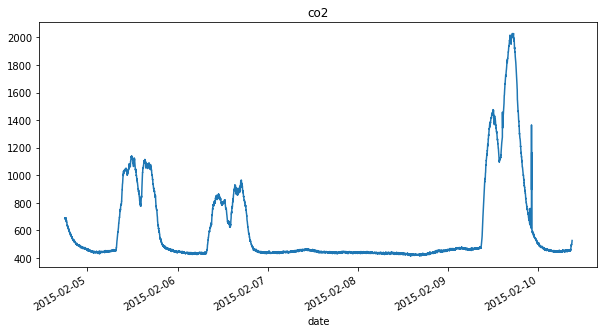

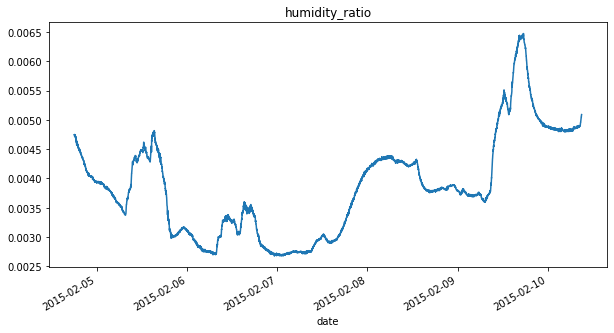

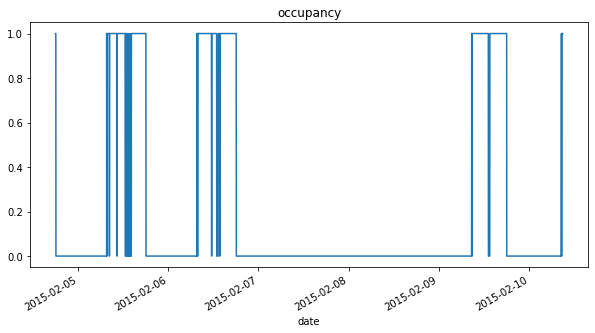

In [12]:
# plot variables

for var in df.columns[0:-1]:
    df[var].plot(figsize=(10, 5))
    plt.title(var)
    plt.show()

In [13]:
# replace target

df = (
    df.reset_index(drop=False)
    .drop("occupancy", axis=1)
    .merge(occ.reset_index(drop=False), on="id")
)

df.head()

,date,temperature,humidity,light,co2,humidity_ratio,id,occupancy
0,2015-02-04 18:00:00,23.075,27.175000,419.0,688.00,0.004745,1,0
1,2015-02-04 18:01:00,23.075,27.150000,419.0,690.25,0.004741,1,0
2,2015-02-04 18:02:00,23.100,27.100000,419.0,691.00,0.004739,1,0
3,2015-02-04 18:03:00,23.100,27.166667,419.0,683.50,0.004751,1,0
4,2015-02-04 18:04:00,23.050,27.150000,419.0,687.50,0.004734,1,0


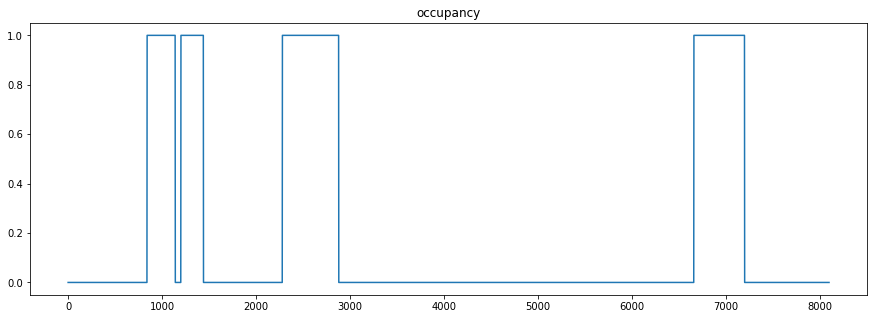

In [14]:
# verify target

df["occupancy"].plot(figsize=(15, 5))
plt.title("occupancy")
plt.show()